In [1]:
!pip install networkx
!pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 5.3 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=1e8263ff9fc75b613b3f3efd1f27809ed0060e86d4669c86faf733ad05d1291f
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# переменные для задачи - посуда (цена, качество, привлекательность)
price = ctrl.Antecedent(np.arange(0, 100, 1), 'price')
quality = ctrl.Antecedent(np.arange(5, 25, 1), 'quality')
attractiveness = ctrl.Consequent(np.arange(3, 15, 1), 'attractiveness')


# используем стандартную функцию принадлежности (треугольник)
attractiveness.automf(names = ['unattractive', 'not very attractive', 'attractive'])



price['darling'] = fuzz.trapmf(price.universe, [0, 0, 20, 50])
price['inexpensive'] = fuzz.trapmf(price.universe, [40, 70, 80, 100])

quality['substandard'] = fuzz.trapmf(quality.universe, [5, 5, 15, 20])
quality['high-quality'] = fuzz.trapmf(quality.universe,[15, 20, 22, 25])
quality

Antecedent: quality

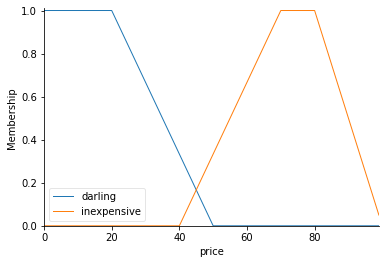

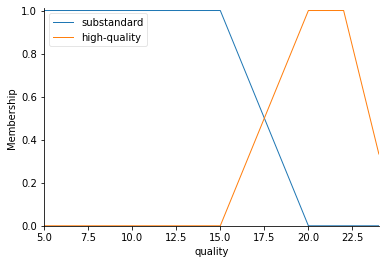

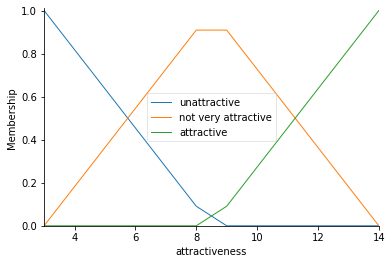

In [3]:
price.view()
quality.view()
attractiveness.view()

In [4]:
# база правил
rule1 = ctrl.Rule(price['inexpensive'] & quality['high-quality'], attractiveness['attractive'])
rule2 = ctrl.Rule(price['inexpensive'] & quality['high-quality'], attractiveness['not very attractive'])
rule3 = ctrl.Rule(price['inexpensive'] & quality['substandard'], attractiveness['unattractive'])
rule4 = ctrl.Rule(price['inexpensive'] & quality['high-quality'], attractiveness['not very attractive'])
rule5 = ctrl.Rule(price['darling'] & quality['high-quality'], attractiveness['attractive'])
rule6 = ctrl.Rule(price['darling'] & quality['high-quality'], attractiveness['unattractive'])
rule7 = ctrl.Rule(price['darling'] & quality['substandard'], attractiveness['attractive'])
rule8 = ctrl.Rule(price['darling'] & quality['substandard'], attractiveness['not very attractive'])

In [5]:
consumption_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8])
consumption_simulator= ctrl.ControlSystemSimulation(consumption_ctrl)

#
consumption_simulator.input['price'] = 90
consumption_simulator.input['quality'] = 15

#
consumption_simulator.compute()
print(consumption_simulator.output['attractiveness'])

5.17552225249773


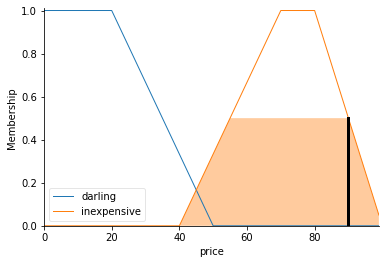

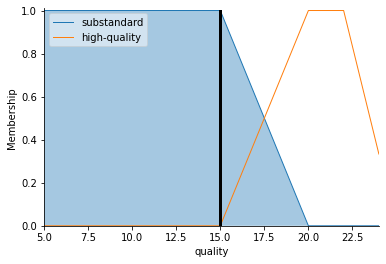

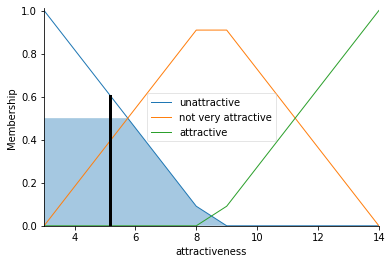

In [6]:
price.view(sim=consumption_simulator)
quality.view(sim=consumption_simulator)
attractiveness.view(sim=consumption_simulator)